In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
kenyan_tweets = pd.read_csv('/content/drive/My Drive/Copy of Kenyan_Tweets_User.csv')
kenyan_tweets.shape

(873172, 17)

In [18]:
class Automation:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self):
        print('Automation in Action...!!!')

    def clean_tweets(self, df, csvfile):
        # drop na in clean tweets column
        df = df[df['clean_text'] != df['clean_text'].isna()]
        # dropduplicates and drop duplicates in clean tweets
        df = df.drop_duplicates().drop_duplicates(subset='clean_text')
        # convert int column appropriately
        df = df[df['polarity'] != 'polarity']
        # convert the created_at column to a datetime object
        df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
        df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
        # convert int column appropriately
        df['polarity'] = df['polarity'].astype('float16')
        df['subjectivity'] = df['subjectivity'].astype('float16')
        df['retweet_count'] = df['retweet_count'].astype('int8')
        df['favorite_count'] = df['favorite_count'].astype('int8')
        df.to_csv(csvfile, index=False)
        return df

    def time_trend(self, df, city):
        ax = df.groupby('created_at')[['retweet_count', 'favorite_count']].sum().plot(figsize=(10,8))
        plt.title(f'Trend of likes and retweets for {city}', size=20)
        plt.ylabel('Frequency', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
    def draw_wordcloud(self, tweets_series, country):
        # word cloud visualization
        allWords = ' '.join([twts for twts in tweets_series])
        wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
        plt.figure(figsize=(12, 9))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f'Most used words describing Food Quatity in {country}', size=20)
        plt.show()

In [19]:
auto = Automation()

Automation in Action...!!!


In [9]:
cleaned_kenyan_tweets = auto.clean_tweets(kenyan_tweets, 'cleaned_kenyan_tweets.csv')

cleaned_kenyan_tweets.shape

(606471, 17)

In [10]:
# Filter Based on Food Keywords
food_keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']

In [11]:
aa = cleaned_kenyan_tweets[['created_at', 'clean_text', 'original_text', 'polarity', 'subjectivity', 'retweet_count',
                            'favorite_count']]

aa.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
food_aa = aa[aa['clean_text'].str.lower().str.contains('|'.join(food_keywords))]
food_aa.shape


(10382, 7)

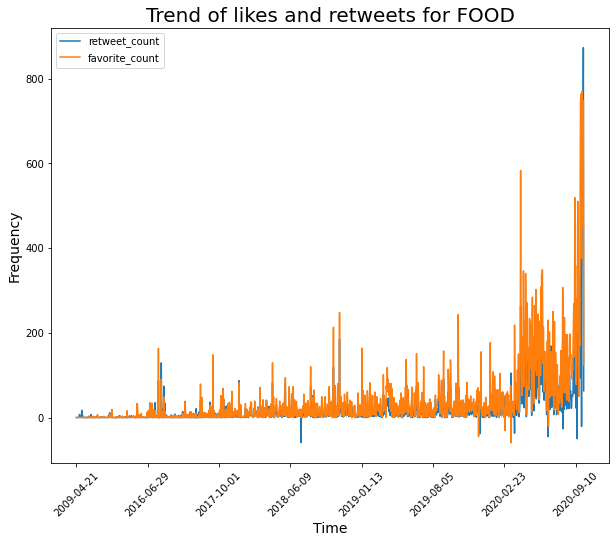

In [13]:
auto.time_trend(food_aa, 'FOOD')

In [14]:
locust = food_aa[food_aa['original_text'].str.lower().str.contains('|'.join(['locust']))]

locust.shape

(92, 7)

Okay let see the trend of the locust. When was peak expereienced? etc

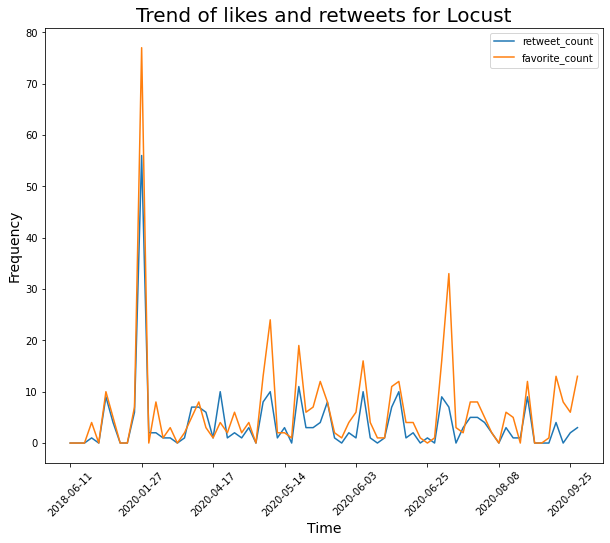

In [15]:
auto.time_trend(locust, 'Locust')

In [16]:
# getting the peak date
locust_df = locust[(locust['created_at'] > '2019-11-01') & 
                                                    (cleaned_kenyan_tweets['created_at'] < '2020-01-27')]
locust_df.shape                                               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(11, 7)

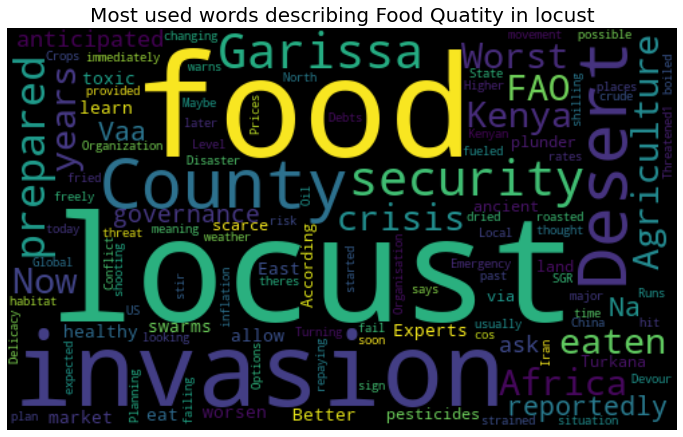

In [20]:
auto.draw_wordcloud(locust_df['clean_text'], 'locust')

It appears that people are really concerend about the food quantity being affected by the locust invasion and some NGO like FAO are tweeting much about it and they are also being mentioned. Questions were being asked from government, experts on the field of Agriculture and the market structure is worsen

Now that the stroy about locust which has proven one thing. People are concerned and the locust invasion had a great impact on the food quantity and the supply chain was severely affected by it

to further butress our point about locust let have a look at the General Tweets of Kenyans Specifically the Peak trends.

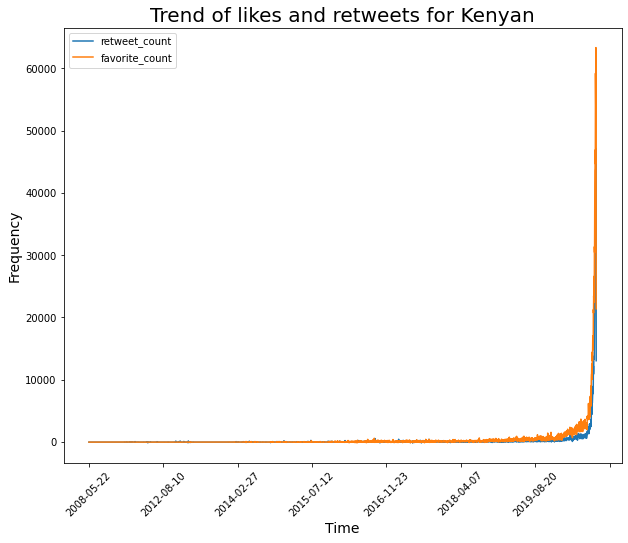

In [21]:
auto.time_trend(cleaned_kenyan_tweets, 'Kenyan')

People Reactions was so much concentrated to twees that occured late 2019 till most recent times. What could they be shouting / clamouring about??

Subset data to contain only tweets from 2019 and before covid was reported in Kenya.

In [22]:
cleaned_kenyan_tweets_2019 = cleaned_kenyan_tweets[(cleaned_kenyan_tweets['created_at'] > '2019-09-01') & 
                                                    (cleaned_kenyan_tweets['created_at'] < '2020-03-13')]
cleaned_kenyan_tweets_2019.shape                                               

(57720, 17)

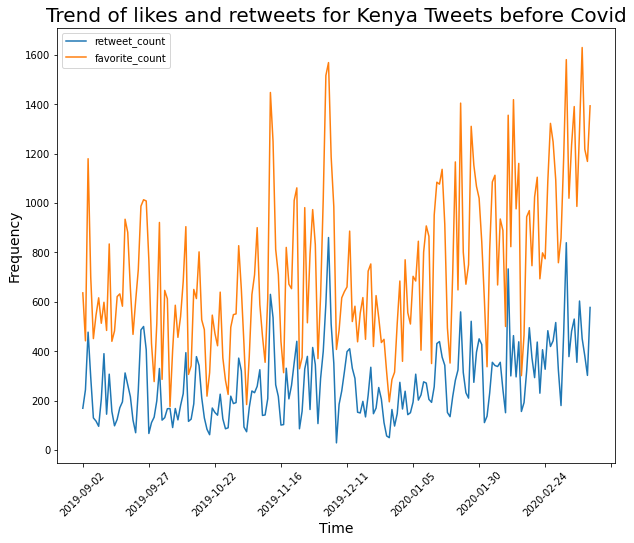

In [24]:
auto.time_trend(cleaned_kenyan_tweets_2019, 'Kenya Tweets before Covid')

People's Reaction was random before covid 19 was reported. Not Much of an insights. Let's investigate during covid except some few dates of February. Maybe it is has a result of the outbreak of covid-19 only that by that time Kenya has zero (0) case of covid 19. So what going on???

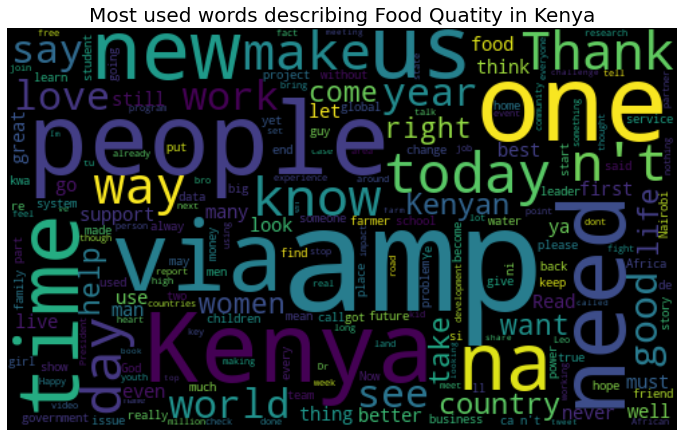

In [25]:
auto.draw_wordcloud(cleaned_kenyan_tweets_2019['clean_text'], 'Kenya')

From the Word Cloud we can assert that people comments were just random and no particular topic is being discussed. Maybe if we drill down to the peak date we might notice somethings NO??

In [26]:
peak1 = cleaned_kenyan_tweets[(cleaned_kenyan_tweets['created_at'] > '2020-01-30') & 
                                                    (cleaned_kenyan_tweets['created_at'] < '2020-02-25')]
peak1.shape                                               

(9360, 17)

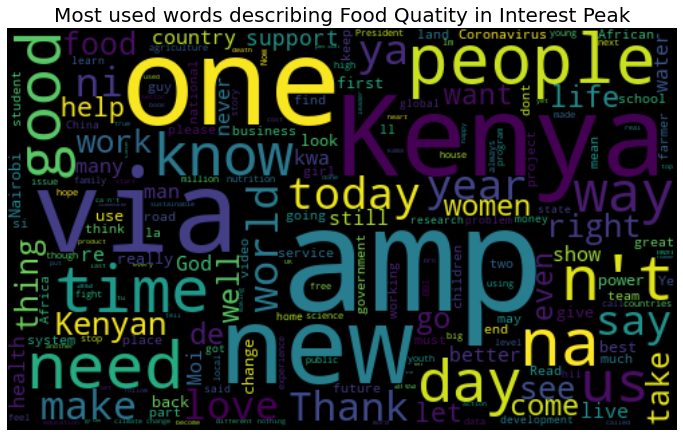

In [27]:
auto.draw_wordcloud(peak1['clean_text'], 'Interest Peak')

It can be observed that People were more concered about their Country Kenya and only little occurance of the word 'coronavirus' has been mentioned since at that time no case has been confirmed in Kenya, this could be true. still food was being mentioned in people's tweets but not as it used to be

Now let subset tweets to get tweets during covid

In [30]:
cleaned_kenyan_tweets_covid = cleaned_kenyan_tweets[(cleaned_kenyan_tweets['created_at'] > '2020-03-13')]
                                                   
cleaned_kenyan_tweets_covid.shape

(432046, 17)

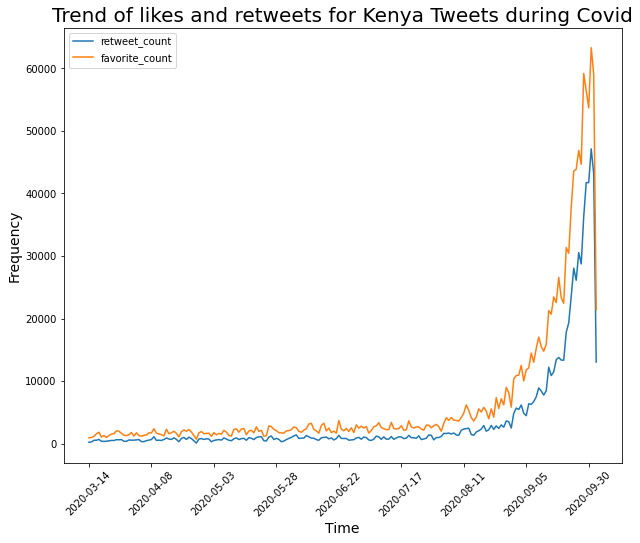

In [31]:
auto.time_trend(cleaned_kenyan_tweets_covid, 'Kenya Tweets during Covid')

A peak could be noticed between 2020-09-05 till 2020-09-30. It would be worth while to check the tweets that occured during those times to ascertain what people are so much interested about

During the lockdown and all other strict Government Policies people's reactions was minimal to tweets but peak was noticed during the late August till present it just keep getting high. Now What is going on? Why were people silent during the lockdown? what are they discussing? etc....

In [32]:
cleaned_kenyan_tweets_covid_nocurfew = cleaned_kenyan_tweets[(cleaned_kenyan_tweets['created_at'] > '2020-09-01')]
                                                   
cleaned_kenyan_tweets_covid_nocurfew.shape

(242963, 17)

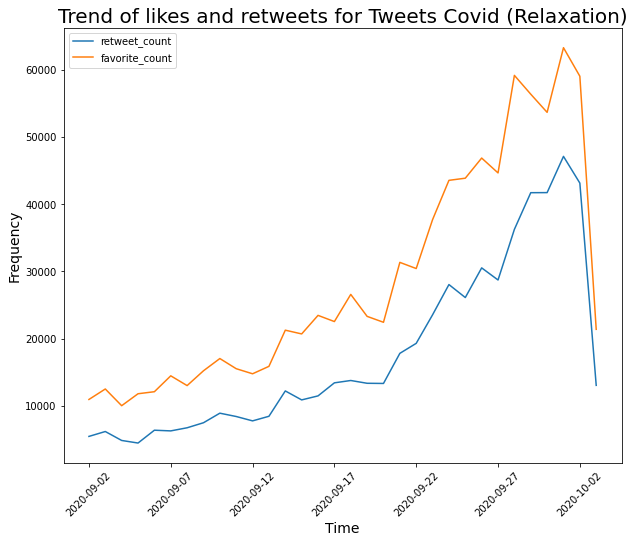

In [33]:
auto.time_trend(cleaned_kenyan_tweets_covid_nocurfew, 'Tweets Covid (Relaxation)')


We can see that the peak only existed during the 22nd of September and it keeps rising. So what tweets occured during this times??

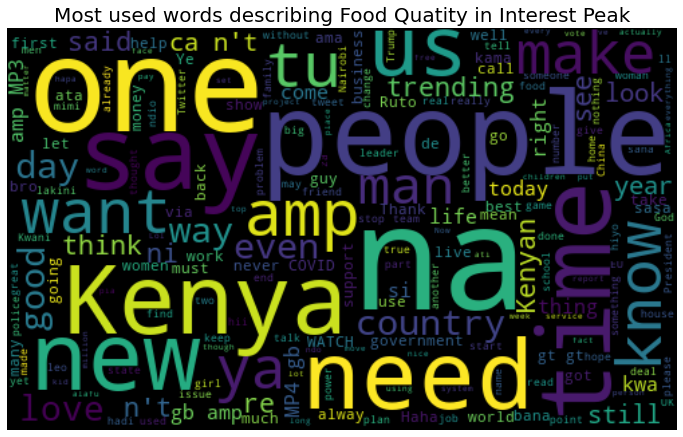

In [37]:
auto.draw_wordcloud(cleaned_kenyan_tweets_covid_nocurfew['clean_text'], 'Interest Peak')

Focus now seems to be about Kenya and it people

In [34]:
max(cleaned_kenyan_tweets['created_at'])

'2020-10-03'

Now let focus on tweets with higher numbers of retweets and likes what were the content of these tweets? what makes them so rich that people are interested in them?

In [35]:
tweets_high_retweets = cleaned_kenyan_tweets[(cleaned_kenyan_tweets['created_at'] > '2020-09-22')]
                                                   
tweets_high_retweets.shape

(130588, 17)

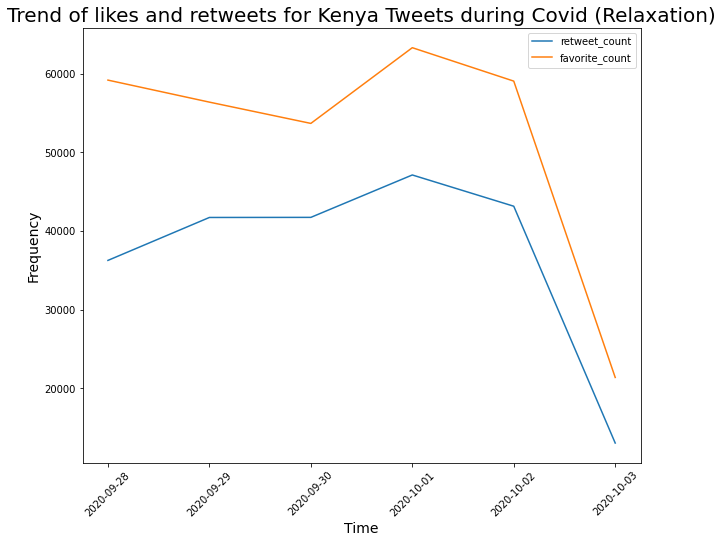

In [26]:
auto.time_trend(tweets_high_retweets, 'Tweets Covid (Relaxation)')


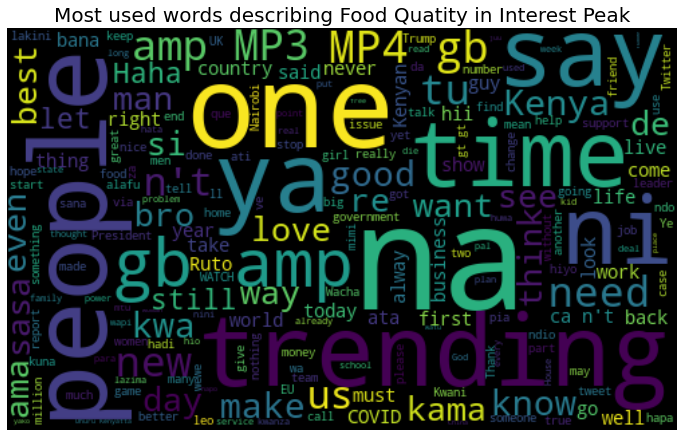

In [38]:
auto.draw_wordcloud(tweets_high_retweets['clean_text'], 'Interest Peak')

## Change Point Analysis of the Kenyan Government

Let investigate how different actions of the Government affect peoples tweets in terms of Food

March 28 24Hour Curfew

## Filter by Keywords

In [30]:
tweets_high_retweets[tweets_high_retweets['clean_text'].str.lower().str.contains('food' or 'insecurity' or 'hunger' or 'hungry')]

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
25873,2020-09-28 16:10:00+00:00,2020-09-28,"<a href=""https://studio.twitter.com"" rel=""nofo...",SoftBank brings food service robot to labor-st...,SoftBank brings food service robot labor-strap...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,2,0,ReutersIndia,False,NaN,NaN,NaN,New Delhi
25920,2020-09-29 00:10:00+00:00,2020-09-29,"<a href=""https://studio.twitter.com"" rel=""nofo...",SoftBank’s robotics arm says it will bring a f...,SoftBanks robotics arm says bring food service...,"Sentiment(polarity=0.1, subjectivity=0.3)",0.099976,0.300049,en,2,1,ReutersIndia,False,NaN,NaN,NaN,New Delhi
25936,2020-09-29 04:10:00+00:00,2020-09-29,"<a href=""https://studio.twitter.com"" rel=""nofo...",This robot named Servi will act as a sort of w...,This robot named Servi act sort waiter using l...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,12,4,ReutersIndia,False,NaN,NaN,NaN,New Delhi
26274,2020-10-02 05:30:00+00:00,2020-10-02,"<a href=""https://studio.twitter.com"" rel=""nofo...",WATCH: Britain's Prince Charles called for the...,WATCH Britain 's Prince Charles called world t...,"Sentiment(polarity=0.16666666666666666, subjec...",0.166626,0.833496,en,2,1,ReutersIndia,False,NaN,NaN,NaN,New Delhi
31312,2020-09-28 04:50:12+00:00,2020-09-28,"<a href=""https://trueanthem.com/"" rel=""nofollo...",SoftBank brings food service robot to labour-s...,SoftBank brings food service robot labour-stra...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,43,10,Reuters,False,NaN,NaN,NaN,Around the world
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857756,2020-09-29 09:26:02+00:00,2020-09-29,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@kelvinmasakhwi Reminds me of the bad food tha...,Reminds bad food distributed Ruto foundation K...,"Sentiment(polarity=-0.6999999999999998, subjec...",-0.700195,0.666504,en,0,0,matesobilachuki,NaN,NaN,kelvinmasakhwi,NaN,NaN
857867,2020-09-29 17:01:30+00:00,2020-09-29,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@OkodeOkumu @Moha001_Onyango How exactly will ...,How exactly put food table By way compare vite...,"Sentiment(polarity=0.25, subjectivity=0.25)",0.250000,0.250000,en,1,0,matesobilachuki,False,NaN,"OkodeOkumu, Moha001_Onyango",NaN,NaN
858485,2020-10-03 14:24:29+00:00,2020-10-03,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@DennisM45941577 So before getting the wheelba...,So getting wheelbarrow sleeping sewerage A whe...,"Sentiment(polarity=0.0, subjectivity=0.1125)",0.000000,0.112488,en,0,0,matesobilachuki,NaN,NaN,DennisM45941577,NaN,NaN
858571,2020-10-03 18:10:00+00:00,2020-10-03,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@_rhamanz @ThomasHallu1 Only brings food after...,Only brings food somebody 's back broken pushi...,"Sentiment(polarity=-0.1, subjectivity=0.35)",-0.099976,0.350098,en,0,0,matesobilachuki,NaN,NaN,"_rhamanz, ThomasHallu1",NaN,NaN


In [31]:
# let get tweets from the high retweets and see which are food related eey
food_tweets = tweets_high_retweets[tweets_high_retweets['clean_text'].str.lower().str.contains('|'.join(food_keywords))]

food_tweets.shape

(457, 17)

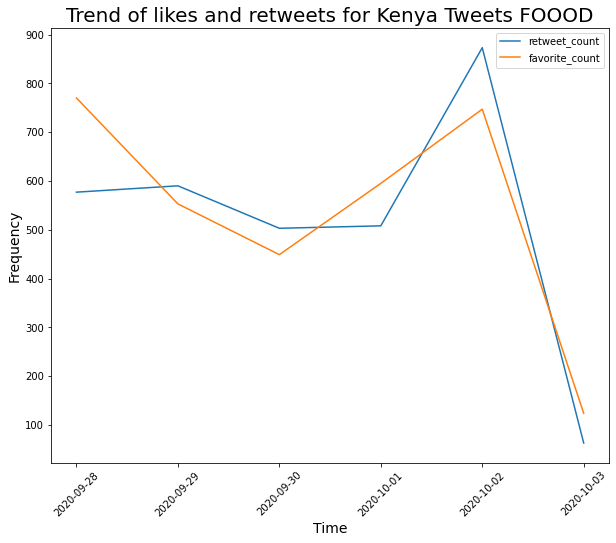

In [33]:
time_trend(food_tweets, 'Kenya Tweets FOOOD')
